#Sentiment Analysis Project
#####Bournemouth University
#####Artificial Intelligence Unit
######Musa Taha Oguzhan Cim, s5553561

#One Pager Poster 
 
##Abstract:
Understanding customer sentiments and opinions is crucial in today's digital landscape.
Sentiment analysis has become an essential tool for businesses to gauge customer opinions
and identify areas of improvement. In this project, we develop an AI-based sentiment
analysis system to evaluate customer feedback and provide insights into positivity or
negativity for informed business strategy. We implement eight different machine learning
algorithms, analyze their performance, and compare the results based on accuracy and
time.
##Introduction:
Sentiment analysis is an NLP technique used to extract subjective information from textual
data such as comments, tweets, and reviews. Businesses need AI-based solutions to
efficiently analyze large volumes of textual data, making AI-based approaches essential for
understanding customer feedback and improving customer satisfaction.
##Real-World Problem:
The Amazon Fine Foods Review dataset provides a real-world problem for sentiment
analysis. The dataset contains over 500,000 reviews collected over ten years. We use this
dataset to implement and compare various machine learning models for sentiment analysis.
##Project Objectives:
Evaluate multiple machine learning algorithms for sentiment analysis.
Explore different aspects of textual data to understand underlying patterns and trends.
Preprocess dataset to ensure quality and format for better predictions and results, and
balance positive and negative sentiment data points, clean the data, and tokenize it.
Examine the possible advantages of ensemble learning techniques.
Compare the performance of different machine learning algorithms based on accuracy, time,
and number of data points.
##AI Approach:
We implement various machine learning algorithms, including logistic regression, naive
Bayes, decision tree, random forest, SVM, transformer, LSTM, and ensemble learning with a
hard voting technique. We evaluate their performances based on accuracy, time, and data
points.
Evaluation, Results, and Discussions:
We analyze the results of each AI approach and discuss their strengths and weaknesses. As
the number of data points increases, accuracy achieved by advanced models like LSTM and
Transformer also increases. However, the time spent on training these models also
increases exponentially.
##Conclusion:
Businesses can choose relatively simple models, like logistic regression or naive Bayes, for
quick results and predictions. If they need better accuracy and are not concerned about
training expenses, they can use the Transformer model. If they have a limited budget and
want higher accuracy, they can choose LSTM.


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Outline of Implementation:
    <li style="padding-left:1em">1.   Importing Libraries</li>
    <li style="padding-left:1em">2.   Loading Data</li>
    <li style="padding-left:1em">3.   Preprocessing</li>
    <li style="padding-left:1em">3.1  Examining The Data</li>
    <li style="padding-left:1em">3.2  Cleaning</li>
    <li style="padding-left:1em">3.3  Splitting</li>
    <li style="padding-left:1em">3.4  Splitting</li>
    <li style="padding-left:1em">4.   Training Models</li>
    <li style="padding-left:1em">4.1. Logistic Regression</li>
    <li style="padding-left:1em">4.2. Naive Bayes</li>
    <li style="padding-left:1em">4.3. Support Vector Machine</li>
    <li style="padding-left:1em">4.4. Decision Tree</li>
    <li style="padding-left:1em">4.5. Random Forest</li>
    <li style="padding-left:1em">4.6. LSTM</li>
    <li style="padding-left:1em">4.7  Transformer</li>
    <li style="padding-left:1em">5.   Ensemble Learning</li>
    <li style="padding-left:1em">6.   Further Discussion</li>
    <li style="padding-left:1em">6.1  How Models Predict</li>
    <li style="padding-left:1em">6.2  Comparison of Confusion Matrices</li>
    <li style="padding-left:1em">6.3  Comparison of Accuracy and Time with the Number of Reviews</li>
             </p> </div>

#Implementation and Discussion

##1. Importing Libraries

In [45]:
!pip install --upgrade transformers -q
!pip install --upgrade accelerate -q

In [46]:
!pip install datasets --quiet
!pip install lime --quiet

In [47]:
#Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
import seaborn as sns
import nltk
import graphviz
from nltk.corpus import stopwords
from collections import Counter
from IPython.display import Image
import re

# Datasets and Transformers libraries
from datasets import load_dataset, Dataset, load_metric
from sklearn.model_selection import train_test_split
from transformers import (AutoTokenizer, AutoModelForSequenceClassification, Trainer,
                          TrainingArguments, DistilBertConfig, DistilBertForSequenceClassification)

# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# LIME for explanations
import lime
from lime.lime_text import LimeTextExplainer

# Scikit-learn classifiers and utilities
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from graphviz import Source
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# WordCloud for visualization
from wordcloud import WordCloud


##2. Loading The Data

<font color='green'>

*   I am loading the data of Amazon Reviews.</font>
 

In [48]:
# This line uses the wget command to download a CSV file from Dropbox.
!wget -q -O Reviews.csv https://www.dropbox.com/s/qd4idpkbuq11poy/Reviews.csv?dl=0

In [49]:
#This line reads in the CSV file that was downloaded in the previous step.
df = pd.read_csv('/content/Reviews.csv', encoding='utf-8')

<font color='green'>

*   Checking the columns of our dataset, for their types and other informations.</font>
 

In [50]:
#This line of code calls the info() method for a summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


##3. Preprocessing


###3.1 Examining The Data





<font color='green'>

*  We want to predict whether text is positive or negative so we need only Text and Score columns, other columns will be removed because they have no impact on the sentiment of text and the score.</font>

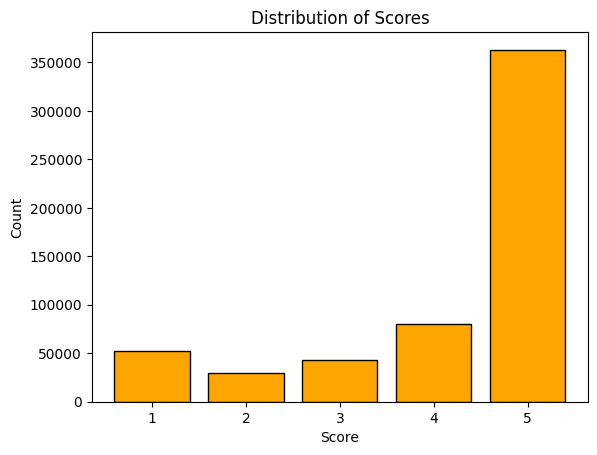

In [51]:
#Thess lines generates a bar plot showing the distribution of scores in a DataFrame.
score_counts = df['Score'].value_counts()
plt.bar(score_counts.index, score_counts.values, color='orange', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()


<font color='green'>

*   There are 5 scores in data set (1,2,3,4,5)
*   We will take 1 as negative and 5 as positive sentiment, we might choose 1 and 2 as negative; 4 and 5 as positive and 3 as neutral but for simplicity, I prefer taking only 1 and 5.
*   Since number of reviews that exist in each score is not equal I will sample them by equal amounts to have balanced data.
</font>
 


<font color='green'>

*   Number of reviews will be determined here for taking subset of whole dataset. Later, we will be examining effect of number of reviews on results.</font>
 

In [52]:
#This line determines the number of data points of each class.
number_of_reviews=500

<font color='green'>

*   I am preprocessing our dataframe to prepare it for machine learning models.</font>
 

In [53]:
df_processed=df.copy()
df_processed = df_processed.drop(df_processed[(df_processed.Score == 2) | (df_processed.Score == 3) | (df_processed.Score == 4)].index)
df_processed.loc[df_processed.Score==1, 'Score'] = 0 #Negative
df_processed.loc[df_processed.Score==5, 'Score'] = 1 #Positive
df_processed = df_processed.loc[:, ['Text', 'Score']]
df_processed=df_processed.reset_index(drop=True)
df_processed_group = df_processed.groupby('Score')
df_processed_sliced = df_processed_group.apply(lambda x: x.sample(number_of_reviews, random_state=42))
df_processed_sliced = df_processed_sliced.reset_index(drop=True)

df_processed_sliced['Score'].value_counts()

0    500
1    500
Name: Score, dtype: int64

<font color='green'>

*  I want to visualize wordclouds and see is there any specific word that users prefer.</font>
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


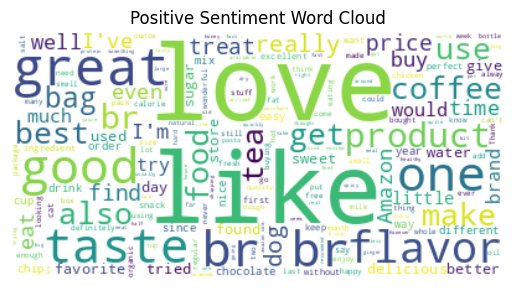

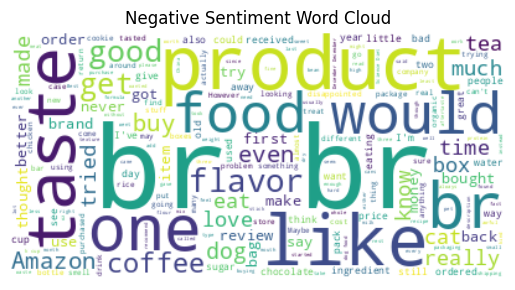

Positive Sentiment - Most Common Words: [('love', 1), ('like', 1), ('great', 1), ('br br', 1), ('good', 1), ('one', 1), ('taste', 1), ('flavor', 1), ('product', 1), ('br', 1)]
Negative Sentiment - Most Common Words: [('br br', 1), ('product', 1), ('like', 1), ('taste', 1), ('one', 1), ('br', 1), ('would', 1), ('food', 1), ('flavor', 1), ('good', 1)]


In [54]:
nltk.download('stopwords')

def generate_wordcloud(df, sentiment, stopwords):
    text = " ".join(review for review in df[df["Score"] == sentiment]["Text"])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    
    word_frequencies = Counter(wordcloud.words_.keys())
    most_common_words = word_frequencies.most_common(10)
    
    return wordcloud, most_common_words

stopwords = set(stopwords.words("english"))

# Generate wordclouds and word frequencies for positive and negative sentiments
positive_wordcloud, positive_most_common_words = generate_wordcloud(df_processed_sliced, 1, stopwords)
negative_wordcloud, negative_most_common_words = generate_wordcloud(df_processed_sliced, 0, stopwords)

# Display wordclouds
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()

plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")
plt.show()

# Display most common words
print("Positive Sentiment - Most Common Words:", positive_most_common_words)
print("Negative Sentiment - Most Common Words:", negative_most_common_words)

<font color='green'>

*   I want to examine is there any correlation between length of text and the sentiment of the text.</font>
 

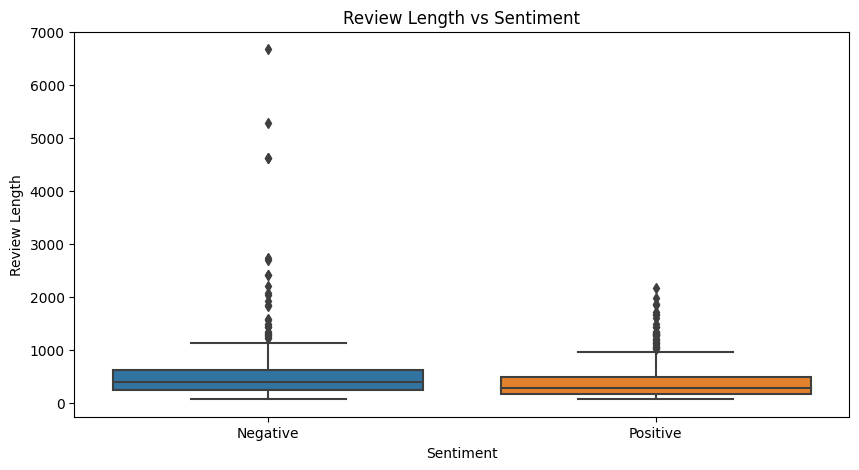

In [55]:
# This line adds a new column to dataframe to represent the length of review.
df_processed_sliced["Text_length"] = df_processed_sliced["Text"].apply(len)

#This line creates the figure and plots data.
plt.figure(figsize=(10, 5))
sns.boxplot(x="Score", y="Text_length", data=df_processed_sliced)
plt.title("Review Length vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.show()


###3.2 Cleaning

<font color='green'>

*   I will be cleaning the unnecesseray characters and remove additional spaces and I want to give a standard format for all data.</font>
 

In [56]:
example_before_cleaning= df_processed_sliced["Text"][0]
def clean_text(text):
    # Removing non-alphanumeric characters
    text = re.sub('[^a-zA-Z]', ' ', text)
      
    # Converting to lowercase
    text = text.lower()  

    # Removing extra whitespace
    text = " ".join(text.split())  
    return text

# Apply cleaning, tokenization, and lemmatization to the 'Text' column
df_processed_sliced["Text"] = df_processed_sliced["Text"].apply(clean_text)

# Preview the processed data
example_after_cleaning=df_processed_sliced["Text"][0]



In [57]:
example_before_cleaning

'If you like the (bitter) taste of Sweet & Low, get this. If you don\'t, don\'t. Couldn\'t get through one cup of coffee (and I only used 1/2 of the tiny packet).<br /><br />I\'m gonna give "Stevia Extract in the Raw" a try. It\'s made by the folks at "Sugar in the Raw." (And, no, I don\'t work for their company.) Here\'s what they claim:<br /><br />"Stevia Extract In The Raw gets its delicious, natural sweetness from Rebiana (aka Reb-A) -- an extract from the Stevia plant. This extract is the sweetest part of the plant and has recently been isolated to provide pure sweetening power without the licorice-like aftertaste that many of our predecessors exhibited. All you get is the sweet flavor without any calories."<br /><br />We\'ll see. Simply-Stevia is simply nasty.'

In [58]:
example_after_cleaning

'if you like the bitter taste of sweet low get this if you don t don t couldn t get through one cup of coffee and i only used of the tiny packet br br i m gonna give stevia extract in the raw a try it s made by the folks at sugar in the raw and no i don t work for their company here s what they claim br br stevia extract in the raw gets its delicious natural sweetness from rebiana aka reb a an extract from the stevia plant this extract is the sweetest part of the plant and has recently been isolated to provide pure sweetening power without the licorice like aftertaste that many of our predecessors exhibited all you get is the sweet flavor without any calories br br we ll see simply stevia is simply nasty'

###3.3 Vectorizing and 

<font color='green'>

*   I will vectorize the text and inside of sklearn.feature_extraction.text there are three options for vectorizing : CountVectorizer, TfidfVectorizer, HashingVectorizer. I will continue with CountVectorizer since it is mostly used in sentiment analysis.  </font>
 

In [59]:
# Extracting text reviews and their corresponding scores from df.
Sentiments = df_processed_sliced['Text']
y = df_processed_sliced['Score'] 

# Creating a CountVectorizer object to transform the text reviews into numerical features
vectorizer1 = CountVectorizer(stop_words='english')
X=vectorizer1.fit_transform(Sentiments)

###3.4 Splitting

<font color='green'>

* I am taking Texts into X and Scores into y.
* CountVectorizer is used with english stopwords to vectorize text.
* And finally, I am seperating data into train and test.</font>

In [60]:
#This line is splitting data to a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

##4. Training Models

<font color='green'>

* I will train models one by one and print accuracies and time spent. </font>

###4.1 Logistic Regression

In [61]:
# importing time module to measure execution time
import time

# Starting measuring the execution time
start_time = time.time()

# Creating a Logistic Regression classifier  
model_LogisticRegression = LogisticRegression(max_iter=1000, random_state=42)
model_LogisticRegression.fit(X_train, y_train)

y_pred_LogisticRegression = model_LogisticRegression.predict(X_test)
accuracy_LogisticRegression = accuracy_score(y_test, y_pred_LogisticRegression)

# Stopping measuring the execution time
end_time = time.time()
time_LogisticRegression=end_time-start_time

In [62]:
print("Accuracy:", accuracy_LogisticRegression)
print("Time:", time_LogisticRegression)


Accuracy: 0.816
Time: 0.08502435684204102


###4.2 Navie Bayes

 



In [63]:
start_time = time.time()

# Initializing Naive Bayes model object
model_NaiveBayes = MultinomialNB()

# Fitting the model to the training data
model_NaiveBayes.fit(X_train, y_train)

y_pred_NaiveBayes = model_NaiveBayes.predict(X_test)
accuracy_NaiveBayes = accuracy_score(y_test, y_pred_NaiveBayes)

end_time = time.time()
time_NaiveBayes=end_time-start_time

In [64]:
print("Accuracy:", accuracy_NaiveBayes)
print("Time:", time_NaiveBayes)


Accuracy: 0.822
Time: 0.004391670227050781


###4.3 Support Vector Machine

In [65]:
start_time=time.time()

#Creating svm classifier
model_SVM =SVC()
model_SVM.fit(X_train, y_train) 
y_pred_svm = model_SVM.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_svm)


end_time = time.time()
time_SVM=end_time-start_time

In [66]:
print("Accuracy:", accuracy_SVM)
print("Time:", time_SVM)


Accuracy: 0.754
Time: 0.2743802070617676


###4.4 Decision Tree

In [67]:
start_time=time.time()

#Creating descision tree classifier
model_DecisionTree = DecisionTreeClassifier()
model_DecisionTree.fit(X_train, y_train)
y_pred_tree = model_DecisionTree.predict(X_test)
accuracy_DecisionTree = accuracy_score(y_test, y_pred_tree)

end_time = time.time()
time_DecisionTree=end_time-start_time

In [68]:
print("Accuracy:", accuracy_DecisionTree)
print("Time:", time_DecisionTree)


Accuracy: 0.664
Time: 0.10682964324951172


<font color='green'>

* Visualization of Decision Tree </font>

Decision Tree visualization:


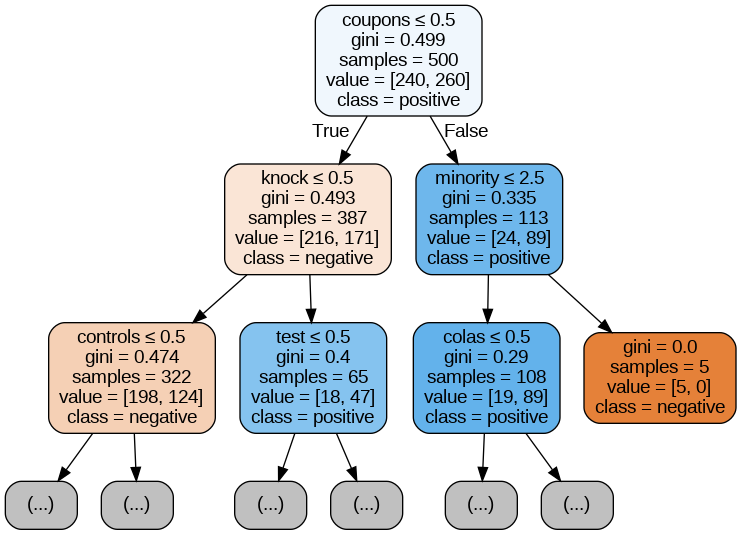

In [69]:
#Getting features and names of the feature on tree
dot_data = export_graphviz(model_DecisionTree, out_file=None, 
feature_names=list(vectorizer1.vocabulary_.keys()),
class_names=["negative", "positive"],
filled=True, rounded=True,
special_characters=True,
max_depth=2)

#Creating graphiv object to visualize
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render("decision_tree")
print("Decision Tree visualization:")
Image(filename='decision_tree.png')

###4.5 Random Forest


In [70]:
start_time=time.time()

#Creating random forest classifier
model_RandomForest=RandomForestClassifier(n_estimators=100, random_state=42)
model_RandomForest.fit(X_train, y_train)
y_pred_rf = model_RandomForest.predict(X_test)
accuracy_RandomForest = accuracy_score(y_test, y_pred_rf)


end_time = time.time()
time_RandomForest=end_time-start_time

In [71]:
print("Accuracy:", accuracy_RandomForest)
print("Time:", time_RandomForest)


Accuracy: 0.792
Time: 1.2787554264068604


<font color='green'>

* Visualization of Random Forest </font>

Random Forest Tree visualization:


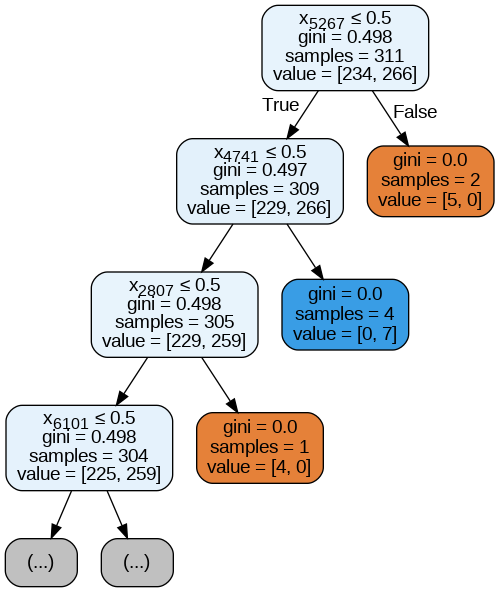

In [72]:
#Getting relevant data of tree
dot_data = export_graphviz(model_RandomForest.estimators_[0], out_file=None,
filled=True, rounded=True,
special_characters=True,
max_depth=3)

#Creating graphviz object for visualization
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('random_forest_tree')
 
print("Random Forest Tree visualization:")
Image(filename='random_forest_tree.png')


###4.6 LSTM Model

In [73]:
train_data, test_data = train_test_split(df_processed_sliced, test_size=0.2, random_state=42)
 
# Setting the maximum number of words to consider and tokenize the train data
max_fatures = 2000
tokenizer_LSTM = Tokenizer(num_words=max_fatures, split=' ')
tokenizer_LSTM.fit_on_texts(train_data['Text'].values)

# Converting the tokenized train data into sequences 
X_train_LSTM = tokenizer_LSTM.texts_to_sequences(train_data['Text'].values)
X_train_LSTM = pad_sequences(X_train_LSTM)

In [74]:
start_time=time.time()

# Defining a Sequential model for LSTM with an Embedding, LSTM and Dense layer
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_fatures, 128))
model_LSTM.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True))
model_LSTM.add(Dense(1, activation='sigmoid'))

# Compiling the LSTM model with loss and optimizer
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting LSTM model with the training data for 6 epochs
history=model_LSTM.fit(X_train_LSTM, train_data['Score'].values, epochs=6, batch_size=32)

# Converting the text reviews in the test set to sequences 
X_test = tokenizer_LSTM.texts_to_sequences(test_data['Text'].values)
X_test = pad_sequences(X_test)

# Evaluating LSTM model and obtaining loss and accuracy
loss, accuracy_LSTM = model_LSTM.evaluate(X_test, test_data['Score'].values)



end_time = time.time()
time_LSTM=end_time-start_time
 

Epoch 1/6
25/25 [==============================] - 14s 422ms/step - loss: 0.6882 - accuracy: 0.5375
Epoch 2/6
25/25 [==============================] - 11s 436ms/step - loss: 0.5424 - accuracy: 0.7862
Epoch 3/6
25/25 [==============================] - 9s 340ms/step - loss: 0.3278 - accuracy: 0.8913
Epoch 4/6
25/25 [==============================] - 6s 255ms/step - loss: 0.2901 - accuracy: 0.9150
Epoch 5/6
25/25 [==============================] - 4s 170ms/step - loss: 0.1873 - accuracy: 0.9488
Epoch 6/6
7/7 [==============================] - 1s 15ms/step - loss: 0.4880 - accuracy: 0.8150


In [75]:
print('Accuracy:', accuracy_LSTM)
print('Time:', time_LSTM)
 

Accuracy: 0.8149999976158142
Time: 48.28835415840149


<font color='green'>

* Plotting accuracy and loss functions of LSTM</font>

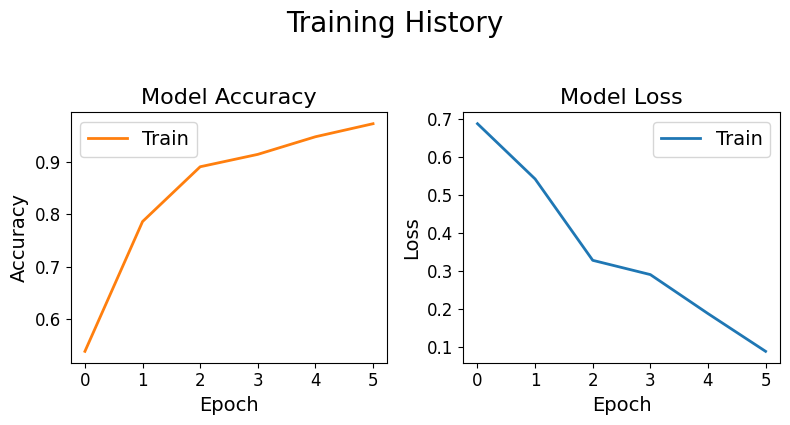

In [76]:
# Setting colors for plot lines
colors = ['#ff7f0e', '#1f77b4']

# Creating figure with two subplots 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plotting training accuracy  
ax[0].plot(history.history['accuracy'], color=colors[0], linewidth=2, label='Train')
ax[0].set_title('Model Accuracy', fontsize=16)
ax[0].set_xlabel('Epoch', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].legend(fontsize=14)

# Plotting training loss  
ax[1].plot(history.history['loss'], color=colors[1], linewidth=2, label='Train')
ax[1].set_title('Model Loss', fontsize=16)
ax[1].set_xlabel('Epoch', fontsize=14)
ax[1].set_ylabel('Loss', fontsize=14)
ax[1].legend(fontsize=14)

# Set the tick label sizes for both subplots
for i in range(2):
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].tick_params(axis='y', labelsize=12)


# Adding a title to plot
fig.suptitle('Training History', fontsize=20, y=1.05)
plt.tight_layout()


plt.show()


###4.7 Transformer Model

In [77]:
reviews = df_processed_sliced['Text']
sentiments = df_processed_sliced['Score']
 
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, random_state=42)

# Specifying pre-trained model and loading corresponding tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Defining a function to tokenize input review
def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True, max_length=512)
X_train = X_train.tolist()
X_test = X_test.tolist()

# Tokenizing data using tokenizer function
X_train_tokenized = tokenize_function(X_train)
X_test_tokenized = tokenize_function(X_test)

train_dataset = Dataset.from_dict({k: v for k, v in zip(["input_ids", "attention_mask", "labels"], [X_train_tokenized["input_ids"], X_train_tokenized["attention_mask"], y_train])})
test_dataset = Dataset.from_dict({k: v for k, v in zip(["input_ids", "attention_mask", "labels"], [X_test_tokenized["input_ids"], X_test_tokenized["attention_mask"], y_test])})

# Defining configuration of the DistilBERT model  
config = DistilBertConfig(vocab_size=len(tokenizer), num_labels=2)
model_Transformer = DistilBertForSequenceClassification(config)

# Defining training arguments 
training_args = TrainingArguments(
    output_dir="output",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    logging_dir="logs",
    learning_rate=2e-5,
     

)

# Loading accuracy metric from Hugging Face 
accuracy_metric = load_metric("accuracy")

# Defining function to compute evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Defining a Trainer object to train and evaluate
trainer = Trainer(
    model=model_Transformer,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

start_time=time.time()

 
trainer.train()
end_time=time.time()
 
eval_result = trainer.evaluate()

time_Transformer=end_time-start_time


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [78]:
print("Evaluation result:", eval_result)

accuracy_Transformer = eval_result['eval_accuracy']
print("Accuracy:", accuracy_Transformer)
print("Time:", time_Transformer)

Evaluation result: {'eval_loss': 0.43204569816589355, 'eval_accuracy': 0.8, 'eval_runtime': 3.2351, 'eval_samples_per_second': 61.823, 'eval_steps_per_second': 7.728, 'epoch': 3.0}
Accuracy: 0.8
Time: 119.00610899925232


<font color='green'>

* We will compare accuracy and time metrics of models with different number of reviews trained, which means number of data points.</font>

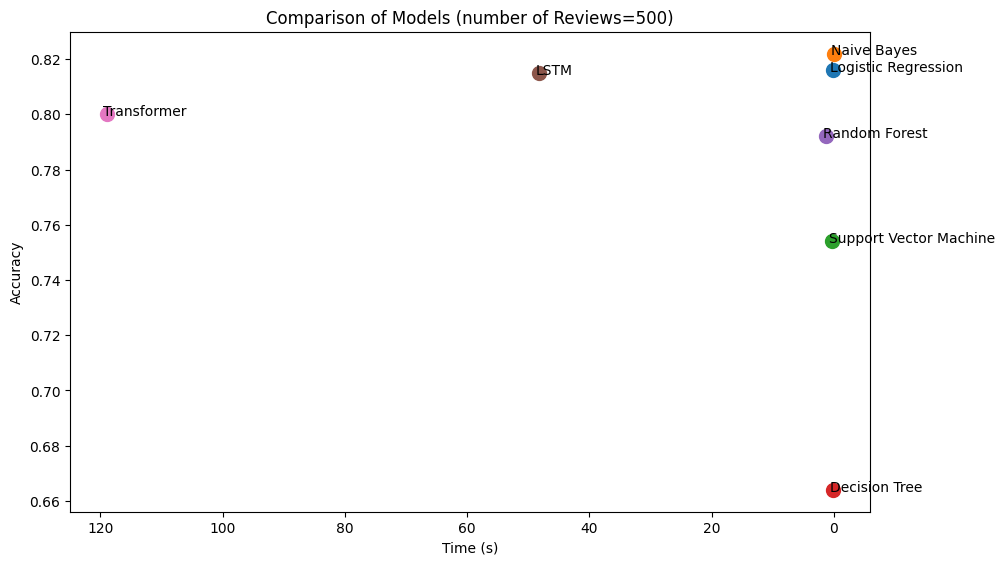

In [79]:
#Creating list for models, times and accuricies
models = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'LSTM', 'Transformer']
times = [time_LogisticRegression, time_NaiveBayes, time_SVM, time_DecisionTree, time_RandomForest, time_LSTM, time_Transformer]
accuracies = [accuracy_LogisticRegression, accuracy_NaiveBayes, accuracy_SVM, accuracy_DecisionTree, accuracy_RandomForest, accuracy_LSTM, accuracy_Transformer]

#Creating figure
fig, ax = plt.subplots(figsize=(10, 6))

# Iterating over the models, times, and accuracies
for model, time, accuracy in zip(models, times, accuracies):
    ax.plot([time], [accuracy], 'o-', markersize=10)
    ax.text(time+0.5, accuracy+0.001, model, ha='left', va='center', fontsize=10)

#Defining parameters of the plot
arrow_length = 0.2
ax.annotate('', xy=(times[-1]-arrow_length, -0.005), xytext=(times[0]+arrow_length, -0.005), arrowprops=dict(arrowstyle='<->', lw=1.5, color='black'))
ax.set_xlim(sorted(ax.get_xlim(), reverse=True))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Accuracy')
plt.title(f'Comparison of Models (number of Reviews={number_of_reviews})')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)
plt.show()


##5. Ensemble Learning

<font color='green'>

* We will use hard voting approach to implement ensemble learning. </font>

In [80]:
# Setting the number of reviews to include in ensemble model
number_of_reviews_ensemble=100
df_processed_sliced_ensemble = df_processed_group.apply(lambda x: x.sample(number_of_reviews_ensemble, random_state=84))
df_ensemble = df_processed_sliced_ensemble.reset_index(drop=True)

# Extracting 'Text' and 'Score' from ensemble Df
Sentiments = df_ensemble['Text']
y_ensemble = df_ensemble['Score']
X_ensemble=vectorizer1.transform(Sentiments)

In [81]:
#Logistic Regression
predictions_LogisticRegression=model_LogisticRegression.predict(X_ensemble)

#Naive Bayes
predictions_NaiveBayes=model_NaiveBayes.predict(X_ensemble)

#Support Vector Machine
predictions_SVM=model_SVM.predict(X_ensemble)

#Decision Tree
predictions_DecisionTree=model_DecisionTree.predict(X_ensemble)

#Random Forest
predictions_RandomForest=model_RandomForest.predict(X_ensemble)

#LSTM
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
X_portion = tokenizer.texts_to_sequences(df_ensemble['Text'].values)
X_portion = pad_sequences(X_portion, maxlen=X_train_LSTM.shape[1])  
predictions = model_LSTM.predict(X_portion)
predictions_LSTM = np.round(predictions).astype(int).flatten()

#Transformer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenized_portion = tokenize_function(df_ensemble['Text'].tolist())

 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenized_portion_tensors = {k: torch.tensor(v).to(device) for k, v in tokenized_portion.items()}
 
model_Transformer.eval()   
with torch.no_grad():
    outputs = model_Transformer(**tokenized_portion_tensors)
    logits = outputs.logits

 
predictions_Transformer = torch.argmax(logits, dim=1).cpu().numpy()


 

7/7 [==============================] - 1s 18ms/step


In [82]:
predictions_All = np.array([predictions_LogisticRegression, predictions_NaiveBayes,predictions_SVM, predictions_DecisionTree, predictions_RandomForest, predictions_LSTM,predictions_Transformer])
ensemble_preds = np.round(np.mean(predictions_All, axis=0))
accuracy_Ensemble = np.mean(ensemble_preds == y_ensemble)
print('Accuracy of Ensemble Learning:',accuracy_Ensemble)


Accuracy of Ensemble Learning: 0.825


<font color='green'>

* Comparison of model accuracies </font>

<ipython-input-83-ae360573c8f9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models + ['Ensemble'], rotation=45, ha='right')


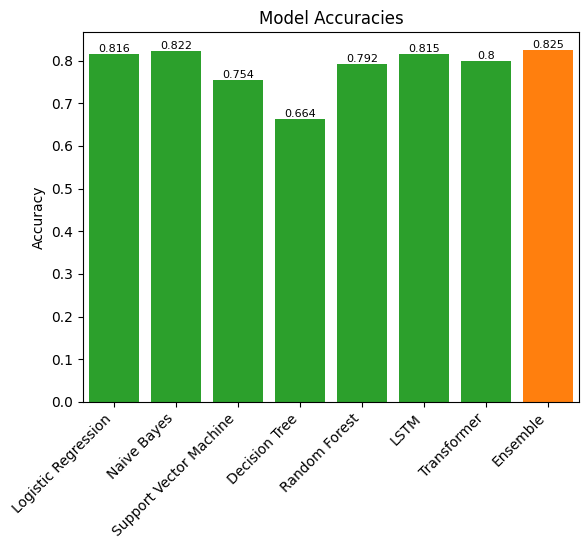

In [83]:
#Creating figure
fig, ax = plt.subplots()
ax.bar(models, accuracies, color='tab:green')
ax.bar('Ensemble', accuracy_Ensemble, color='tab:orange')


#Setting of plot
for i, v in enumerate(accuracies):
    ax.text(i, v, str(round(v, 3)), ha='center', va='bottom', fontsize=8)
ax.text(len(models), accuracy_Ensemble, str(round(accuracy_Ensemble, 3)), ha='center', va='bottom', fontsize=8)
ax.set_xlim(-0.5, len(models) + 0.5)   
ax.set_xticklabels(models + ['Ensemble'], rotation=45, ha='right')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')

plt.show()

 

#Further Discussion

##1. How Model Predict

<font color='green'>

* By using LimeTextExplainer library, we are checking the negativity and positivity effect of each words in text in logistic regression. </font>

In [84]:
# Initializing LimeTextExplainer object to explain model prediction 
explainer = LimeTextExplainer(class_names=["Negative", "Positive"])

# Setting index of review to be explained
review_idx = 15
# Getting text from Df
review_text = df_processed_sliced["Text"][review_idx]

# Defining function to predict probabilities
def logistic_regression_predict_proba(texts):
    transformed_texts = vectorizer1.transform(texts)
    return model_LogisticRegression.predict_proba(transformed_texts)

# Using xplainer to generate explanation
explanation = explainer.explain_instance(
    review_text, logistic_regression_predict_proba, num_features=10
)

 
explanation.show_in_notebook()


<font color='green'>

* By using LimeTextExplainer library, we are checking the negativity and positivity effect of each words in text in LSTM. </font>

In [85]:
#Defining function for probabilities
def lstm_predict_proba(texts):
    tokenized_texts = tokenizer_LSTM.texts_to_sequences(texts)
    padded_texts = pad_sequences(tokenized_texts, maxlen=512, padding="post", truncating="post")
    positive_probabilities = model_LSTM.predict(padded_texts)
    negative_probabilities = 1 - positive_probabilities
    return np.hstack((negative_probabilities, positive_probabilities))

#Getting index and corresponding text
review_idx = 25
review_text = df_processed_sliced["Text"][review_idx]

#Using explainer object
explanation = explainer.explain_instance(
    review_text, lstm_predict_proba, num_features=10
)

 
explanation.show_in_notebook()


157/157 [==============================] - 2s 8ms/step


##2. Comparison of Confusion Matrices

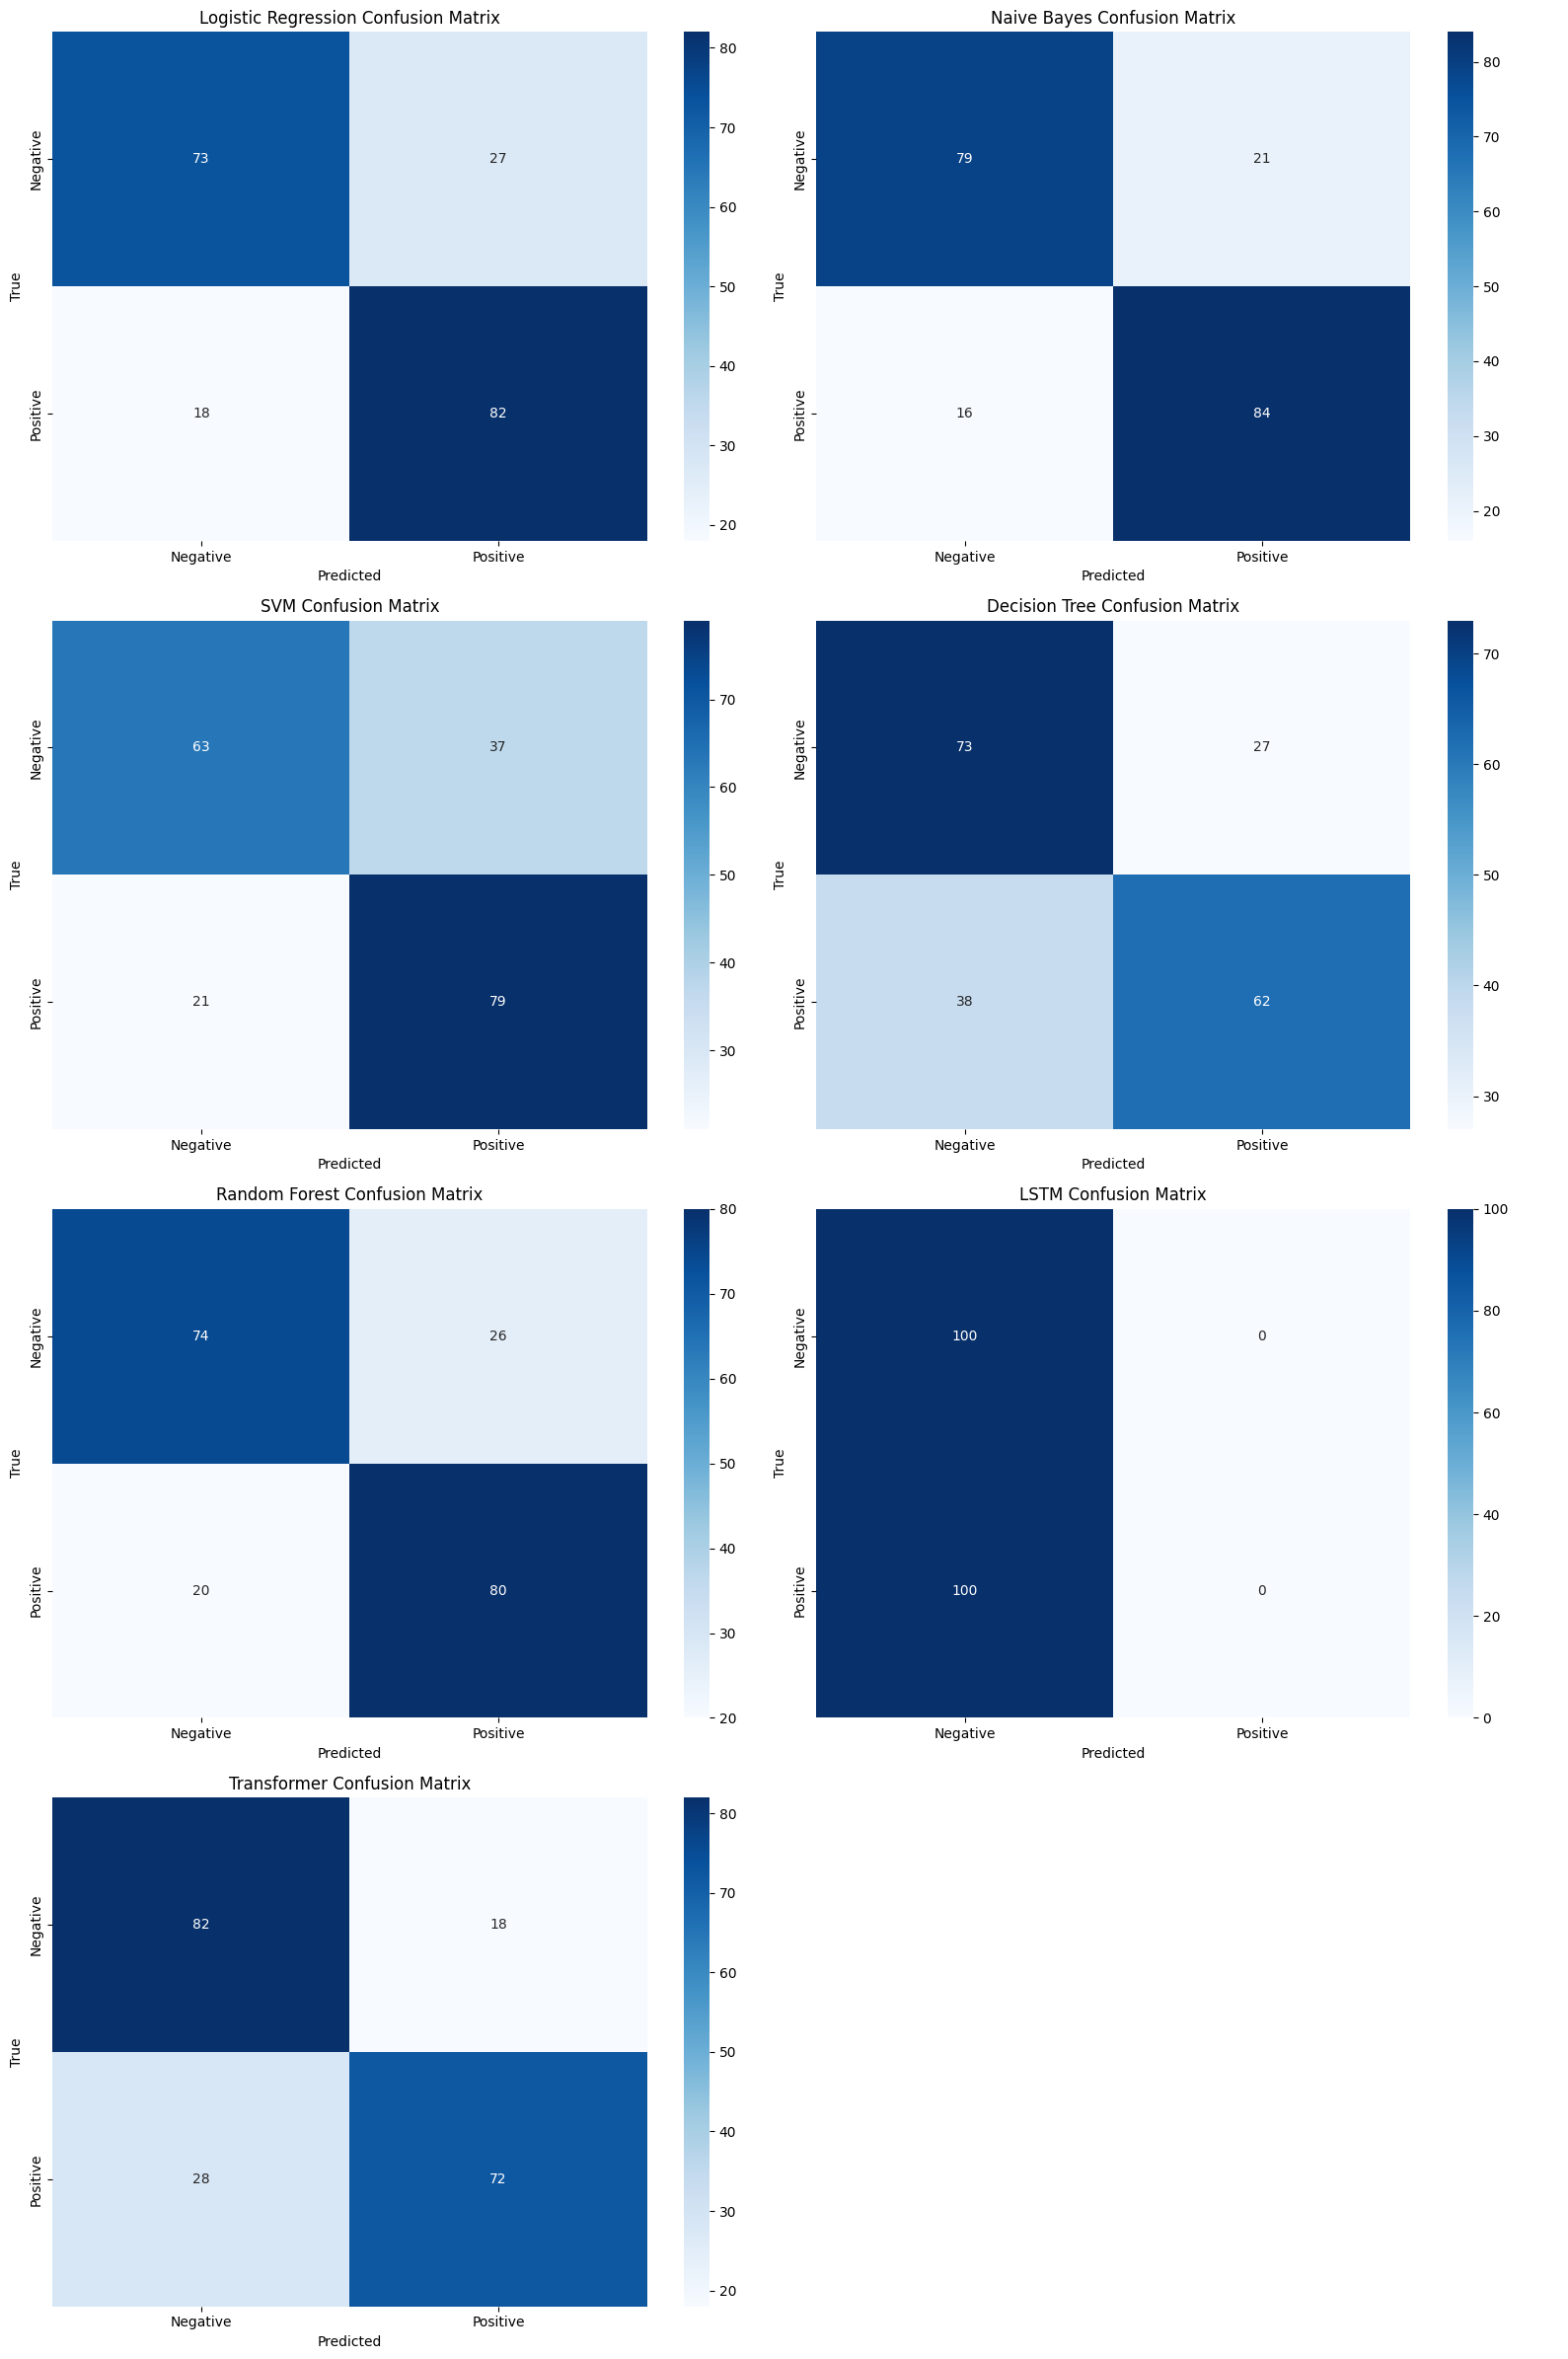

In [86]:
#Plotting the given dat
def plot_cm(cm, labels, title, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

#Defining dictionary type data
cms = {}
cms['Logistic Regression'] = confusion_matrix(y_ensemble, predictions_LogisticRegression)
cms['Naive Bayes'] = confusion_matrix(y_ensemble, predictions_NaiveBayes)
cms['SVM'] = confusion_matrix(y_ensemble, predictions_SVM)
cms['Decision Tree'] = confusion_matrix(y_ensemble, predictions_DecisionTree)
cms['Random Forest'] = confusion_matrix(y_ensemble, predictions_RandomForest)
cms['LSTM'] = confusion_matrix(y_ensemble, predictions_LSTM)
cms['Transformer'] = confusion_matrix(y_ensemble, predictions_Transformer)

#Creating figure and plotting
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
axes = axes.ravel()
target_names = ['Negative', 'Positive']

for i, (name, cm) in enumerate(cms.items()):
    plot_cm(cm, target_names, f'{name} Confusion Matrix', axes[i])

 
axes[-1].axis('off')
plt.tight_layout()
plt.show()

##3. Comparison of Accuracy and Time with the Number of Reviews

In [87]:
#Importing result images from github link
!git clone https://github.com/musacim/Results.git

fatal: destination path 'Results' already exists and is not an empty directory.


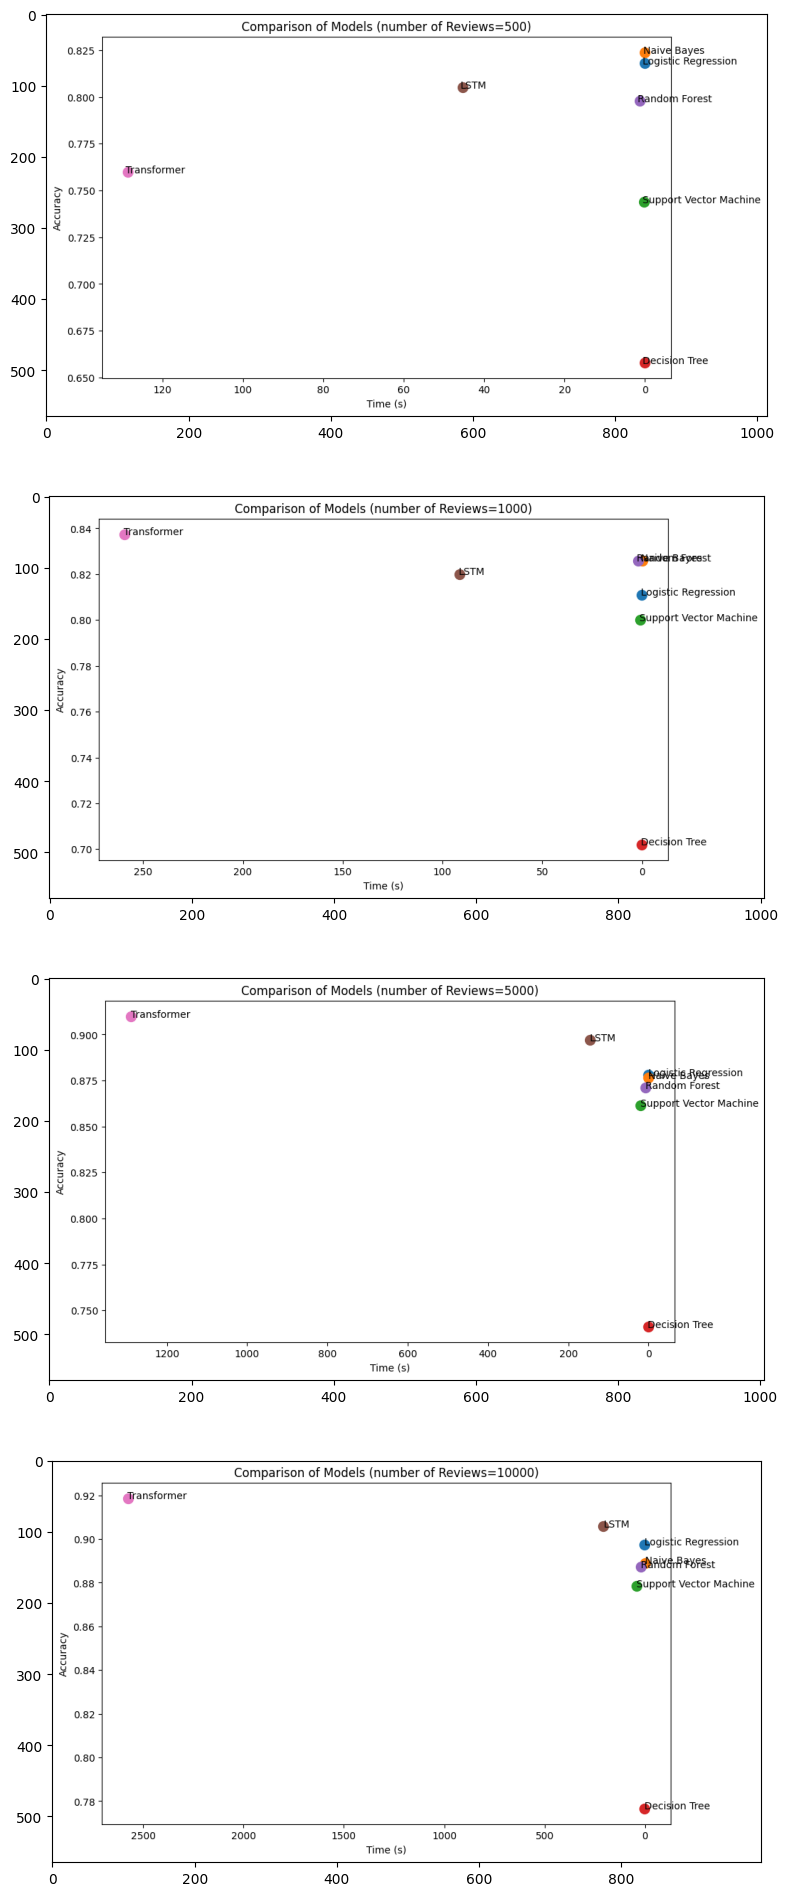

In [88]:
#Loading images
import matplotlib.pyplot as plt

img1 = plt.imread('/content/Results/500.png')
img2 = plt.imread('/content/Results/1000.png')
img3 = plt.imread('/content/Results/5000.png')
img4 = plt.imread('/content/Results/10000.png')

#Creating figure
fig = plt.figure(figsize=(18, 24))

#Creating subplots
plt.subplot(4, 1, 1)
plt.imshow(img1)

plt.subplot(4, 1, 2)
plt.imshow(img2)

plt.subplot(4, 1, 3)
plt.imshow(img3)

plt.subplot(4, 1, 4)
plt.imshow(img4)

plt.show()